**COURSE PROJECT**
# Exploratory Data Analysis On House Sales Using Python!



# House Sales!

In this project, we'll be analyzing house sales and factors affecting house sales, and will be communicating ideas graphically.

This Dataset was pulled from the `Open Dataset`folder gotten alongside course materials of the [Data Analysis with Python: Zero to Pandas](zerotopandas.com) course, the dataset has 1,400+ rows and upto 8 columns.

This is a data on house sales, contains `house ID's, House style,Neighbourhood, Year built, Sale price etc`, and i'll running an analysis on it to look for relationships among different columns and to draw inferences on future sales. In this project, i'll be making use of some powerful python libraries like `Pandas, Numpy, Seaborn and Matplotlib` and also will be applying all the principles learnt from the [Data Analysis with Python: Zero to Pandas](zerotopandas.com) Course.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Downloading the Dataset

**TODO** - we'll be importing all the tools we'll be using for this analysis and will read our file using the pandas `read_csv` method since our data is in csv format.

In [2]:
import numpy as np
import pandas as pd

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
test_df = pd.read_csv('test.csv', usecols = ['Id','HouseStyle','OverallQual','OverallCond','YearBuilt','RoofStyle','GarageCars','MoSold','YrSold','SaleCondition'],na_values=['', '?', '-'],skip_blank_lines= True)

The dataset has been downloaded and extracted.

In [4]:
test_df.head()

,Id,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,GarageCars,MoSold,YrSold,SaleCondition
0,1461,1Story,5,6,1961,Gable,1.0,6,2010,Normal
1,1462,1Story,6,6,1958,Hip,1.0,6,2010,Normal
2,1463,2Story,5,5,1997,Gable,2.0,3,2010,Normal
3,1464,2Story,6,6,1998,Gable,2.0,6,2010,Normal
4,1465,1Story,8,5,1992,Gable,2.0,1,2010,Normal


Let us save and upload our work to Jovian before continuing.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Data Preparation and Cleaning

**TODO** - Let's set the `ID` column to be the index of this dataframe and use the python `info()` method to see if there is any missing value in the dataset, if there is, then we employ methods of cleaning to get the data ready for analysis.

We will also merge this dataframe with another `sample` data frame so as to access the `SalePrice` of the houses, and these sales are in `US Dollars($)`.



In [5]:
sample_df = pd.read_csv('sample_submission.csv',na_values=['', '?', '-'],skip_blank_lines= True)
sample_df.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [6]:
df = test_df.merge(sample_df, how = 'inner', on='Id')

In [7]:
df.head()

,Id,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,GarageCars,MoSold,YrSold,SaleCondition,SalePrice
0,1461,1Story,5,6,1961,Gable,1.0,6,2010,Normal,169277.052498
1,1462,1Story,6,6,1958,Hip,1.0,6,2010,Normal,187758.393989
2,1463,2Story,5,5,1997,Gable,2.0,3,2010,Normal,183583.683570
3,1464,2Story,6,6,1998,Gable,2.0,6,2010,Normal,179317.477511
4,1465,1Story,8,5,1992,Gable,2.0,1,2010,Normal,150730.079977


In [8]:
df = df.fillna(df['GarageCars'].mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   HouseStyle     1459 non-null   object 
 2   OverallQual    1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   RoofStyle      1459 non-null   object 
 6   GarageCars     1459 non-null   float64
 7   MoSold         1459 non-null   int64  
 8   YrSold         1459 non-null   int64  
 9   SaleCondition  1459 non-null   object 
 10  SalePrice      1459 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 136.8+ KB


In [10]:
df['GarageCars'].unique()

array([1.        , 2.        , 3.        , 0.        , 4.        ,
       5.        , 1.76611797])

In [11]:
df = df.set_index('Id')

In [12]:
df.head(5)

,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,GarageCars,MoSold,YrSold,SaleCondition,SalePrice
Id,,,,,,,,,,
1461,1Story,5,6,1961,Gable,1.0,6,2010,Normal,169277.052498
1462,1Story,6,6,1958,Hip,1.0,6,2010,Normal,187758.393989
1463,2Story,5,5,1997,Gable,2.0,3,2010,Normal,183583.683570
1464,2Story,6,6,1998,Gable,2.0,6,2010,Normal,179317.477511
1465,1Story,8,5,1992,Gable,2.0,1,2010,Normal,150730.079977


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Exploratory Analysis and Visualization

**TODO** - Here, we will be computing the mean, sum, range and other interesting statistics for numeric columns, explore distributions of numeric columns using histograms etc. We will also explore relationship between columns using scatter plots, bar charts etc.



In [13]:
df.describe()

,OverallQual,OverallCond,YearBuilt,GarageCars,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,5.553804,1971.357779,1.766118,6.104181,2007.769705,179183.918243
std,1.436812,1.113740,30.390071,0.775679,2.722432,1.301740,16518.303051
min,1.000000,1.000000,1879.000000,0.000000,1.000000,2006.000000,135751.318893
25%,5.000000,5.000000,1953.000000,1.000000,4.000000,2007.000000,168703.011202
50%,6.000000,5.000000,1973.000000,2.000000,6.000000,2008.000000,179208.665698
75%,7.000000,6.000000,2001.000000,2.000000,8.000000,2009.000000,186789.409363
max,10.000000,9.000000,2010.000000,5.000000,12.000000,2010.000000,281643.976117


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - **We will be using a scatter plot to check for correlations or relationships among columns `YearBuilt` and `SalePrice`.**

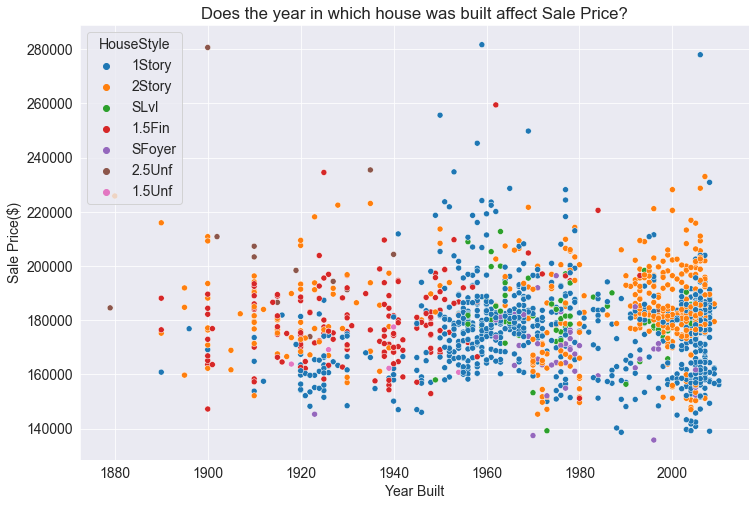

In [12]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = df['YearBuilt'], y = df['SalePrice'], hue = df['HouseStyle']);
plt.xlabel('Year Built');
plt.ylabel('Sale Price($)');
plt.title('Does the year in which house was built affect Sale Price?');


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1pNPWpgMSrFyFEo7TLhqOZXnSTicDLHLe" align="left"  width="55" height="65" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>

<div class="alert alert-info" role="alert" style="font-family:Yu Mincho Demibold;font-size:20px;color:  black">
From the above plot, we can see:
    

* The year house was built does not affect price house was sold.

* We used house style as `hue`, and we can see that from around `1880` to around `1945`, more of `1.5fin` and `2Story` house styles were sold.
* we can also see that more of `1Story` style houses were sold and that around `2000`'s, `2Story` house styles began competing with `1Story` house styles.
    </div>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

**TODO** - **We will be looking at the frequency of houses sold in each particular month of the year.**

In [5]:
cf = df['MoSold'].value_counts().reset_index()
cf

NameError: name 'df' is not defined

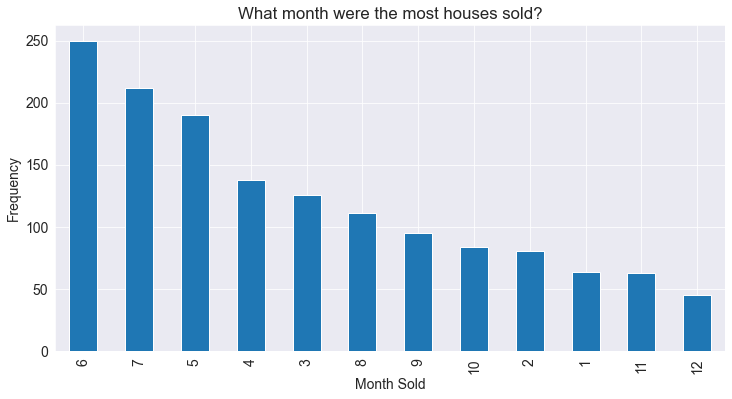

In [44]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('What month were the most houses sold?')
plt.xlabel('Month Sold')
plt.ylabel('Frequency')
cf.plot(kind = 'bar');
# sns.barplot(x=cf.index, y = cf );

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<div class="alert alert-info" role="alert" style="font-family:Yu Mincho Demibold;font-size:20px;color:  black">
From this plot, it is not hard to see that more houses were sold on `june(6)` and less houses were sold on `december(12)`, maybe because people prioritized Festive periods over spending on houses.*
    </div>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

**TODO** - **We will be using a Bar Chart to check the frequency of houses sold over the years.**

In [15]:
df['YrSold'] = df['YrSold'].astype('int32')

In [16]:
df

,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,GarageCars,MoSold,YrSold,SaleCondition,SalePrice
Id,,,,,,,,,,
1461,1Story,5,6,1961,Gable,1.0,6,2010,Normal,169277.052498
1462,1Story,6,6,1958,Hip,1.0,6,2010,Normal,187758.393989
1463,2Story,5,5,1997,Gable,2.0,3,2010,Normal,183583.683570
1464,2Story,6,6,1998,Gable,2.0,6,2010,Normal,179317.477511
1465,1Story,8,5,1992,Gable,2.0,1,2010,Normal,150730.079977
...,...,...,...,...,...,...,...,...,...,...
2915,2Story,4,7,1970,Gable,0.0,6,2006,Normal,167081.220949
2916,2Story,4,5,1970,Gable,1.0,4,2006,Abnorml,164788.778231
2917,1Story,5,7,1960,Gable,2.0,9,2006,Abnorml,219222.423400


In [17]:
df['YrSold'].dtype

dtype('int32')

In [16]:
df['YrSold'].value_counts()

2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64

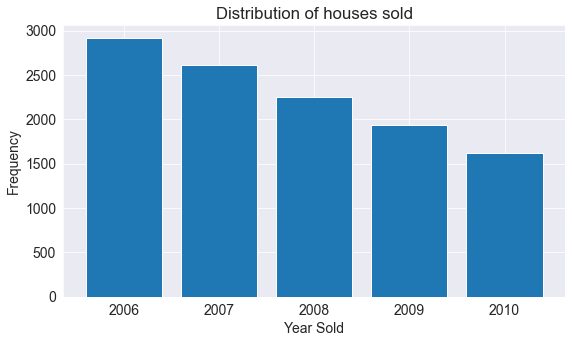

In [17]:
plt.bar(df['YrSold'], df.index);
plt.xlabel('Year Sold');
plt.ylabel('Frequency');
plt.title('Distribution of houses sold');

> *This Bar chart is a plot of year house was sold and the frequency.*
> *We can see that above `350` houses were sold within the months of `2006`(dense around here) and just a little above `150` houses were sold in the year `2010`.*
> *We can also see that the number of houses sold decreased over the years.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

**TODO** - We will be using a box plot to look at what the house `OverallQual` and `OverallCond` looks like and make assertions on the dataset.

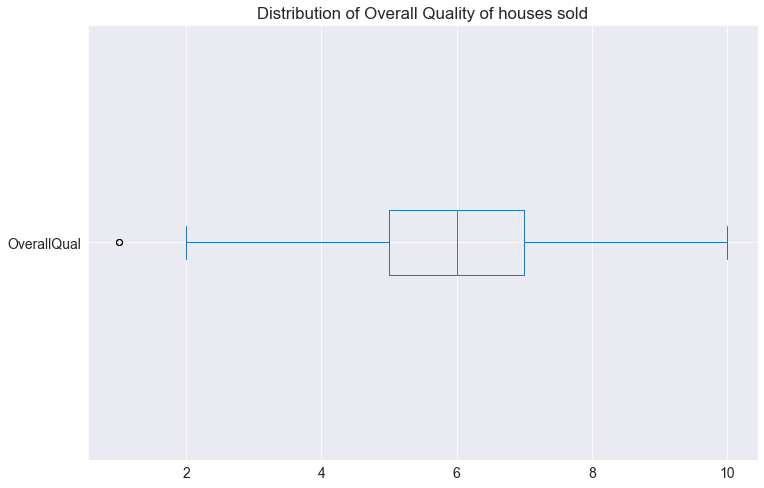

In [43]:
df['OverallQual'].plot(kind='box', figsize = (12,8), vert = False);
plt.title('Distribution of Overall Quality of houses sold');

> *From this box and whiskers, we can see where the values lies majorly, we can see that the values ranges from `2-10`, and the median lies at `6`, we can also see the `1st quartile` and the `3rd quartile`, we can also see that the majority of values in the `OverallQual` column of this dataset lies between `5-7`. that is, more houses had an `overall quality of 5-7`.*

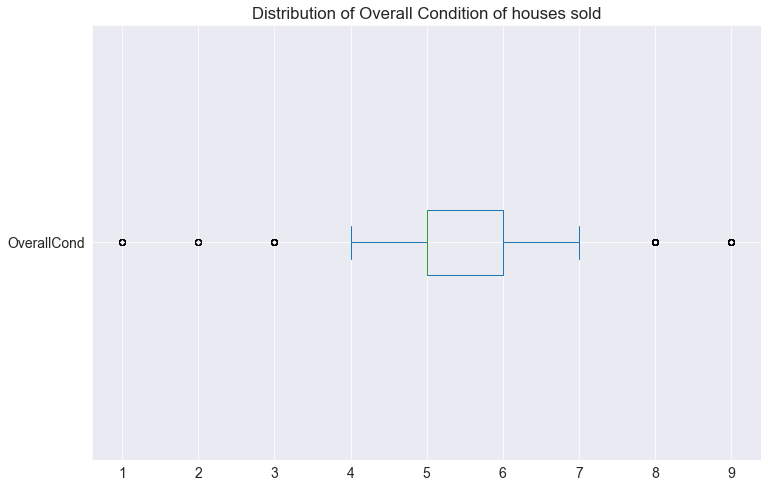

In [44]:
df['OverallCond'].plot(kind='box', figsize = (12,8), vert = False);
plt.title('Distribution of Overall Condition of houses sold');

> *From the above plot, there are a few things to take away: we can see that, in the `OverallCond` column of this dataset, the minimum value of is `4` and the maximum value is `7`,  the median is `5` and we can also see the `1st` and `3rd` quartiles `5 and 6` respectively.*

> We can also see that the majority of the overall condition of theses houses when they were sold were between `5 and 6`.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [28]:
df.head(5)

,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,GarageCars,MoSold,YrSold,SaleCondition,SalePrice
Id,,,,,,,,,,
1461,1Story,5,6,1961,Gable,1.0,6,2010,Normal,169277.052498
1462,1Story,6,6,1958,Hip,1.0,6,2010,Normal,187758.393989
1463,2Story,5,5,1997,Gable,2.0,3,2010,Normal,183583.683570
1464,2Story,6,6,1998,Gable,2.0,6,2010,Normal,179317.477511
1465,1Story,8,5,1992,Gable,2.0,1,2010,Normal,150730.079977


**TODO** - **We will try to look at the condition of the houses when they were sold.**

Text(0.5, 1.0, 'Distribution of condition of houses sold')

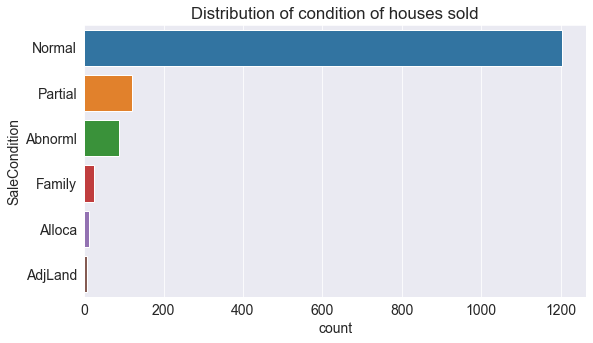

In [46]:
sns.countplot(y=df['SaleCondition']);
plt.title('Distribution of condition of houses sold')

> *From this Seaborn's countplot, we can clearly see that more houses with condition `Normal` were sold and houses of condition `AdjLand` rarely sold.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

**What is the average sale price of the houses?**

Text(0.5, 1.0, 'Distribution of sale prices of houses sold')

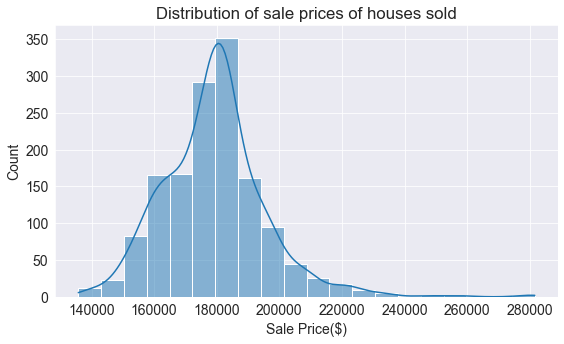

In [48]:
sns.histplot(x=df['SalePrice'], bins=20, kde=True);
plt.xlabel('Sale Price($)')
plt.title('Distribution of sale prices of houses sold')

> *Here, we can say that the saleprice of the houses sold is normally distributed. and since it is dense around `$170000 -$190000`, it means that we have more number of hours that were sold within that range.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

**TODO** - **We will be using a pie chart to graphically show the distribution of the `House Style` of houses sold.**

In [46]:
af = df['HouseStyle'].value_counts()
af

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

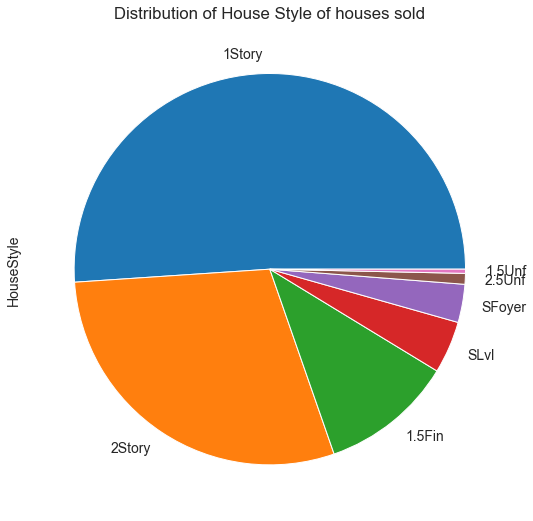

In [45]:
af.plot(kind = 'pie', figsize = (14,9));
plt.title('Distribution of House Style of houses sold');

> *We can clearly see that the majority of houses sold has the style `1Story` and we can also see that the house style of `1.5Unf` rarely sold, so as someone into real estate, i could buy more of `1Story` buildings because `Stats` show that they sell more.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Asking and Answering Questions

TODO - **Here, we will be asking multiple questions about this dataset, questions like, `how many houses were built before 1960?`, `Percentage of houses sold for a particular month`, `Adding some column`, `Getting a list of different roof styles in the dataframe` etc.**

> We will also be making use of python pandas library for manipulation, aggregation, applying conditions and making simple numeric calculations.

> We will also be making use of python's matplotlib library to create a line graph.



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Q1: TODO - What is the percentage of houses sold in january(1)?

In [64]:
house_perc = (df['MoSold']).sum()
house_jan = (df['MoSold']==1).sum()
percen = (house_jan/house_perc)*100
print('The percentage of houses sold in january is {}%'.format(percen))

The percentage of houses sold in january is 0.7186166629238716%


> The percentage of houses sold in the month of january is 0.72%. this means that houses were rarely sold in january, maybe because people are still trying to gather themselves for the year.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Q2: TODO - How many houses with Abnormal condition where sold above $200000?

In [92]:
df[(df['SaleCondition'] =='Abnorml') & (df['SalePrice'] > 200000)].value_counts().sum()

10

> *We applied some conditions in order to answer this question using pandas. Then we now see that the number of houses with `Condition Abnormal` and was sold above `$200000` was `10`.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Q3: TODO - What is the most loved(most sold) House style?

In [181]:
a = df['HouseStyle'].value_counts()
a

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

In [ ]:
plt.plot(years, apples, 's-b')

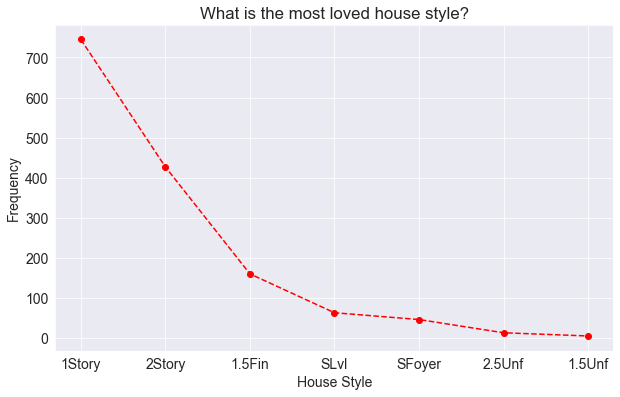

In [197]:
plt.figure(figsize=(10,6))
plt.plot(a,'o--r' );
plt.xlabel('House Style')
plt.ylabel('Frequency')
plt.title('What is the most loved house style?');

> *Both the above line plot and the calculations made with pandas is communicating the same idea, clearly, by a high margin, the most loved(most sold) house style is the `1Story` House style and understandably so, maybe because it's affordable, not too big and okay for a family.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Q4: TODO - Let's add some column `imga_col` that is a product of the `SalePrice` and `GarageCars`.

In [100]:
df.head(5)

,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,GarageCars,MoSold,YrSold,SaleCondition,SalePrice
Id,,,,,,,,,,
1461,1Story,5,6,1961,Gable,1.0,6,2010,Normal,169277.052498
1462,1Story,6,6,1958,Hip,1.0,6,2010,Normal,187758.393989
1463,2Story,5,5,1997,Gable,2.0,3,2010,Normal,183583.683570
1464,2Story,6,6,1998,Gable,2.0,6,2010,Normal,179317.477511
1465,1Story,8,5,1992,Gable,2.0,1,2010,Normal,150730.079977


In [126]:
df['Imga_col'] = (df['SalePrice']*df['GarageCars'])

In [127]:
df.head(5)

,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,GarageCars,MoSold,YrSold,SaleCondition,SalePrice,Imga_col
Id,,,,,,,,,,,
1461,1Story,5,6,1961,Gable,1.0,6,2010,Normal,169277.052498,169277.052498
1462,1Story,6,6,1958,Hip,1.0,6,2010,Normal,187758.393989,187758.393989
1463,2Story,5,5,1997,Gable,2.0,3,2010,Normal,183583.683570,367167.367139
1464,2Story,6,6,1998,Gable,2.0,6,2010,Normal,179317.477511,358634.955022
1465,1Story,8,5,1992,Gable,2.0,1,2010,Normal,150730.079977,301460.159953


> *Throuugh some simple mathematical calculations, we've been able to add a new column too our dataframe named `imga_col`.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Q5: TODO - what is the averge saleprice of houses sold before year 2008?

In [164]:
a = df[df['YrSold'] < 2008]
a['SalePrice'].mean()

181041.215123239

> *The average `SalePrice` of houses sold before year `2008` is `$181041.215`.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Q6: TODO - Retrieve a list of RoofStyles from the dataframe?

In [173]:
df['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Flat', 'Mansard', 'Shed'], dtype=object)

> *The list of `RoofStyle` include, `Gable`,`Hip`,`Gambrel`,`Flat`,`Mansard`, and `Shed`.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Q7: TODO - What is the max garagecars of houses built before 1960?

In [110]:
df.head(5)

,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,GarageCars,MoSold,YrSold,SaleCondition,SalePrice
Id,,,,,,,,,,
1461,1Story,5,6,1961,Gable,1.0,6,2010,Normal,169277.052498
1462,1Story,6,6,1958,Hip,1.0,6,2010,Normal,187758.393989
1463,2Story,5,5,1997,Gable,2.0,3,2010,Normal,183583.683570
1464,2Story,6,6,1998,Gable,2.0,6,2010,Normal,179317.477511
1465,1Story,8,5,1992,Gable,2.0,1,2010,Normal,150730.079977


In [198]:
befo_1960 = df[df['YearBuilt'] < 1960]
befo_1960['GarageCars'].max()

5.0

> *Surprisingly, the maximum space `(GarageCars)` for cars provided in houses built before year 1960 that was sold, is `5`.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Q8: TODO - Create a dataframe containing 10 Houses that are not styled 1Story with the highest Sale Prices

In [199]:
df[df['HouseStyle'] != '1Story'].sort_values('SalePrice', ascending=False).head(10)

,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,GarageCars,MoSold,YrSold,SaleCondition,SalePrice,Imga_col
Id,,,,,,,,,,,
2251,2.5Unf,5,1,1900,Hip,1.0,1,2008,Normal,280618.132617,280618.132617
2797,1.5Fin,6,5,1962,Gable,2.0,10,2006,Normal,259423.859148,518847.718295
2823,2.5Unf,6,8,1935,Gable,2.0,12,2006,Normal,235419.373449,470838.746898
2754,1.5Fin,5,5,1925,Gable,3.0,7,2006,Normal,234492.248264,703476.744791
1667,2Story,8,5,2007,Gable,3.0,6,2009,Family,232991.025584,698973.076751
2629,2Story,10,5,2006,Hip,3.0,9,2006,Partial,228684.245138,686052.735414
1862,2Story,7,5,2000,Hip,4.0,10,2009,Normal,228156.372839,912625.491357
1857,2Story,5,7,1880,Gable,2.0,6,2009,Normal,225810.160292,451620.320584
2425,2Story,5,4,1935,Gable,3.0,11,2007,Family,223055.588672,669166.766017


> *We can see a reformatted dataframe that was sorted buy values of `SalePrice` in descending order.*

### How many houses with overall Condition 4 was sold above 200000?

In [120]:
df[(df['OverallCond'] == 4) & (df['SalePrice'] > 200000)].value_counts().sum()

8

> *Houses with overall condition `4` that was sold above `$200000` was `8`.*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Inferences and Conclusion

**TODO** - **In this analysis, alot of inferences have been drawn and here's quick look again at them:**




* Based on the data here, we can infer that the year house was built does not affect the price it's sold, however, style of houses sold over the years varied with only house style `1Story` maintaining a good number.

* We also found out that houses were sold more in the month of june(1) and were rarely sold in December and January`(0.72%)`.

* We also found out that houses with Overall Condition `5 & 6`(out of 10) were sold more, meaning that houses below or above that value were in the minority, and houses with Sale Condition `Normal` sold much more than the others.

* `8` houses with an overall condition of `4` was sold above `$200000`.

* From this dataset, we can infer that the `1Story` house style is loved most by buyers. etc.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## References and Future Work

**TODO** - Check out the following resources to learn more on this topic:

- `opendatasets` Python library: https://github.com/JovianML/opendatasets
- `Pandas` user guide: https://pandas.pydata.org/docs/user_guide/index.html
- `Matplotlib` user guide: https://matplotlib.org/3.3.1/users/index.html
- `Seaborn` user guide & tutorial: https://seaborn.pydata.org/tutorial.html